# Ejercicio SVM datos Eurocopa 2012
A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

## 1. Importa las librerias necesarias

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Carga los datos

In [3]:
futbol = pd.read_csv("Data/Euro_2012_stats_TEAM.csv")

## 3. Obtener la matriz de correlación con TODAS las variables. ¿Hay algunas columnas que estén muy correlacionadas?

<AxesSubplot:>

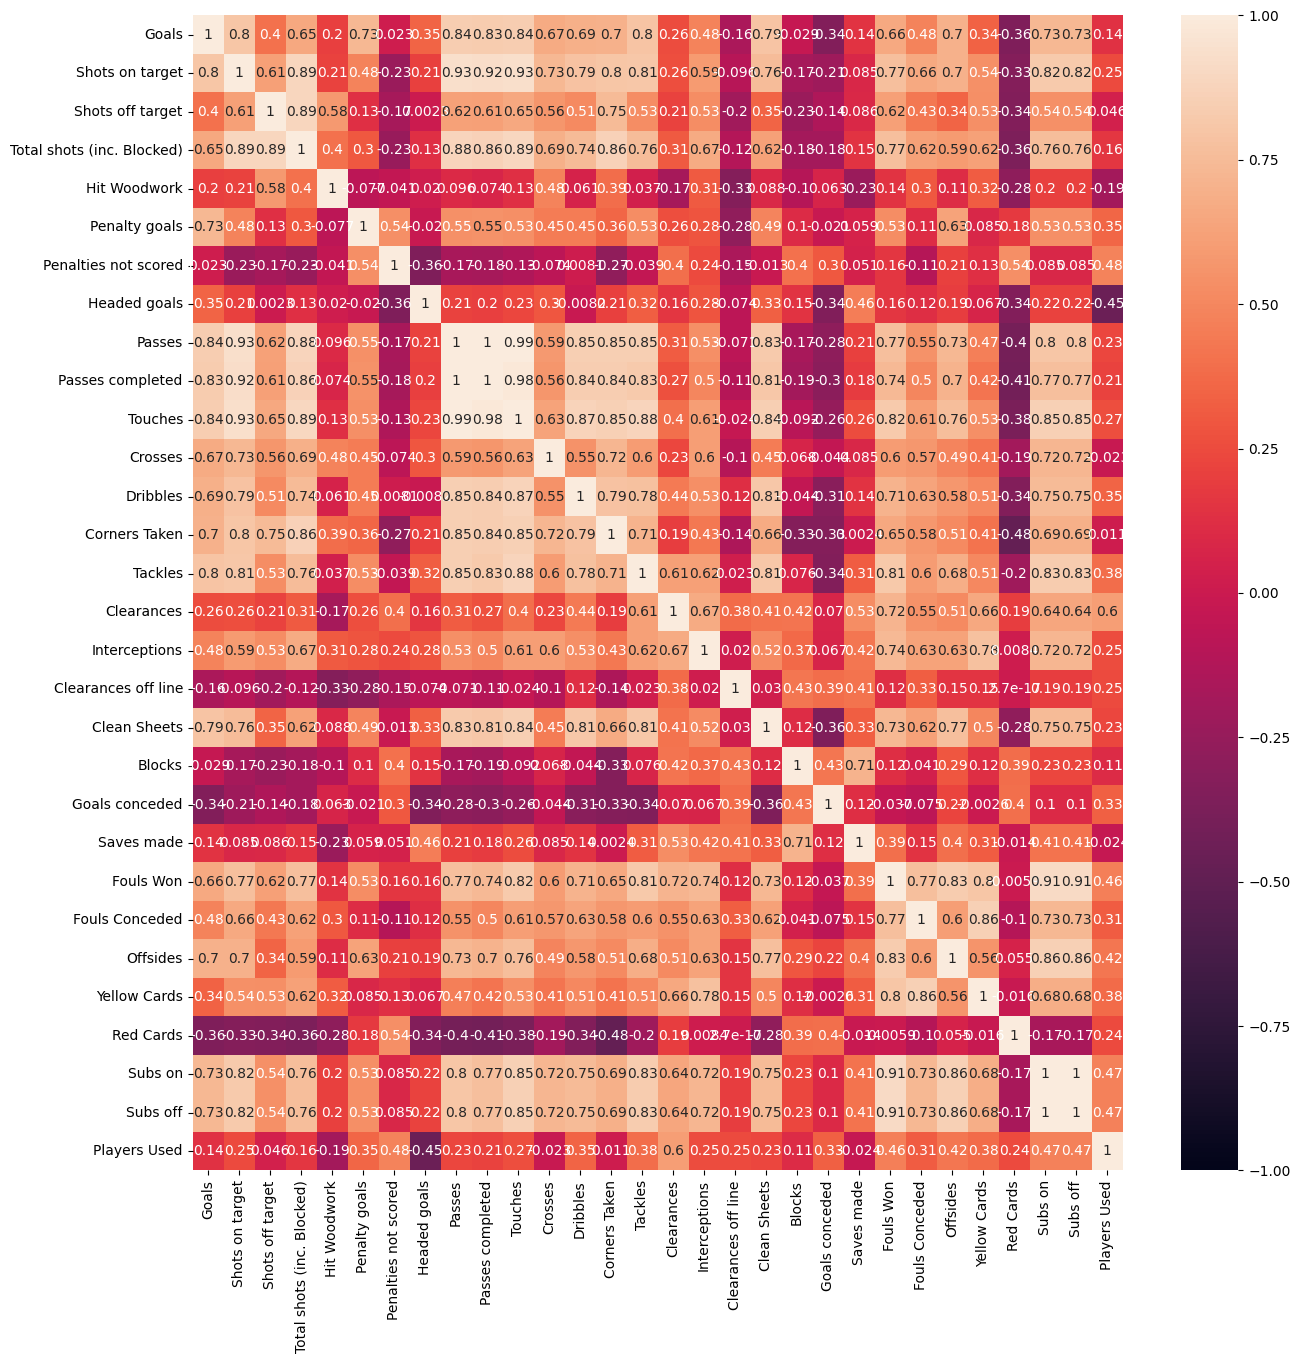

In [4]:
plt.figure(figsize = (15,15))
sns.heatmap(futbol.corr(),annot=True, vmin=-1, vmax=1)

In [5]:
futbol.corr()

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.650109,0.200512,0.730437,0.023094,0.349330,0.838497,0.830062,...,-0.337689,0.143912,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.886090,0.212932,0.478610,-0.229945,0.210571,0.930337,0.923242,...,-0.214415,0.085059,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,0.887032,0.581655,0.126783,-0.173221,0.002284,0.624451,0.612998,...,-0.139274,0.086157,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Total shots (inc. Blocked),0.650109,0.886090,0.887032,1.000000,0.400121,0.299397,-0.234668,0.125738,0.875698,0.864279,...,-0.184740,0.148269,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,0.400121,1.000000,-0.076923,-0.041345,0.020174,0.095882,0.073814,...,0.062541,-0.230524,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.299397,-0.076923,1.000000,0.537484,-0.020174,0.545294,0.550720,...,-0.020847,0.058761,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.234668,-0.041345,0.537484,1.000000,-0.357830,-0.169613,-0.179278,...,0.302532,0.051019,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.125738,0.020174,-0.020174,-0.357830,1.000000,0.213073,0.200605,...,-0.344447,0.458773,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214
Passes,0.838497,0.930337,0.624451,0.875698,0.095882,0.545294,-0.169613,0.213073,1.000000,0.997697,...,-0.284982,0.207240,0.773382,0.549248,0.731938,0.465799,-4.002506e-01,0.800546,0.800546,0.232214
Passes completed,0.830062,0.923242,0.612998,0.864279,0.073814,0.550720,-0.179278,0.200605,0.997697,1.000000,...,-0.300837,0.184878,0.738845,0.499351,0.704802,0.420410,-4.062897e-01,0.766326,0.766326,0.213345


In [6]:
corr_abs = np.abs(futbol.corr())
correlation_df = corr_abs[(corr_abs > 0.95) & (corr_abs < 1)]
more_correlated = [column for column in correlation_df.notna().columns if any(correlation_df.notna()[column] == True)]
print("Las siguientes columnas presentan una correlación mayor del 95% con cualquier otra columna del dataframe:\n",more_correlated)

Las siguientes columnas presentan una correlación mayor del 95% con cualquier otra columna del dataframe:
 ['Passes', 'Passes completed', 'Touches']


In [7]:
futbol2 = pd.DataFrame(futbol)


In [14]:
futbol2['Shooting Accuracy'] = futbol2['Shooting Accuracy'].str.replace('%', '')
futbol2['Shooting Accuracy'] = futbol2['Shooting Accuracy'].astype(float)

## 4. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

In [15]:

X = futbol2[['Shooting Accuracy']]
         
           
y = futbol2['Goals']

In [16]:
X_train, y_train = futbol2['Shooting Accuracy'], futbol2['Shooting Accuracy']
x_test, y_test = futbol2['Goals'], futbol2['Goals']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (12, 1)	y_train: (12,)
X_test: (4, 1)	y_test: (4,)


In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
print(lm)
print(type(lm))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


In [19]:
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
y_hat = lm.predict(X_test)
y_hat

array([5.29997592, 3.73793799, 2.94297226, 4.95130674])

In [24]:
y_hat_train = lm.predict(X_train)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MODELO DE REGRESIÓN LINEAL')
print(f"MSE Train: {mean_squared_error(y_train, y_hat_train):.2f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_hat_train):.2f}")
print(f"R^2 Train: {r2_score(y_train, y_hat_train):.2f}")

print("\n\n")

print(f"MSE Test: {mean_squared_error(y_test, y_hat):.2f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_hat):.2f}")
print(f"R^2 Test: {r2_score(y_test, y_hat):.2f}")

MODELO DE REGRESIÓN LINEAL
MSE Train: 6.59
MAE Train: 2.22
R^2 Train: 0.26



MSE Test: 3.22
MAE Test: 1.61
R^2 Test: -0.91


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lm2 = LogisticRegression()
lm2.fit(X_train, y_train)

c:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [33]:
y_hat2= lm2.predict(X_test)

In [31]:
y_hat2_train = lm2.predict(X_train)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MODELO DE REGRESIÓN Logistica')
print(f"MSE Train: {mean_squared_error(y_train, y_hat2_train):.2f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_hat2_train):.2f}")
print(f"R^2 Train: {r2_score(y_train, y_hat2_train):.2f}")

print("\n\n")

print(f"MSE Test: {mean_squared_error(y_test, y_hat2):.2f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_hat2):.2f}")
print(f"R^2 Test: {r2_score(y_test, y_hat2):.2f}")

MODELO DE REGRESIÓN Logistica
MSE Train: 10.08
MAE Train: 2.08
R^2 Train: -0.14



MSE Test: 4.75
MAE Test: 1.75
R^2 Test: -1.81


In [36]:
from sklearn.svm import SVR

In [40]:
lm_svr = SVR()
lm_svr.fit(X_train, y_train)
y_hat3 = lm_svr.predict(X_test)
y_hat3_train = lm_svr.predict(X_train)

In [41]:
print('MODELO SVR')
print(f"MSE Train: {mean_squared_error(y_train, y_hat3_train):.2f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_hat3_train):.2f}")
print(f"R^2 Train: {r2_score(y_train, y_hat3_train):.2f}")

print("\n\n")

print(f"MSE Test: {mean_squared_error(y_test, y_hat3):.2f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_hat3):.2f}")
print(f"R^2 Test: {r2_score(y_test, y_hat3):.2f}")

MODELO SVR
MSE Train: 8.67
MAE Train: 2.08
R^2 Train: 0.02



MSE Test: 4.12
MAE Test: 1.65
R^2 Test: -1.44


In [43]:
futbol2['Goals'].max()

12

## 5. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [44]:
clases = {
    0: '1',
    1: '2',
    2: '3',
    3: '4',
    4: '5',
    5: '6',
    6: '7',
    7: '8',
    8: '9',
    10: '11',
    11 : '12'

}


In [46]:
print(futbol2.groupby('clase').size())

KeyError: 'clases'